# LUAD CPTAC analysis

In [38]:
import pandas as pd
import numpy as np
from msresist.pre_processing import preprocessing
from msresist.clustering import MassSpecClustering
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.2, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [3]:
# pd.set_option('display.max_colwidth', 1000)
# pd.set_option('display.max_rows', 1000000)
# pd.set_option('display.max_columns', 1000)

## Import and Preprocess Data

In [4]:
# X = preprocessing(CPTAC=True, log2T=True)
X = pd.read_csv("msresist/data/MS/CPTAC/CPTAC-preprocessedMotfis.csv").iloc[:, 1:]

d = X.select_dtypes(include=['float64']).T
i = X.select_dtypes(include=['object'])

In [265]:
X.head()

,Sequence,Protein,Gene,Position,C3N.01799,C3N.01799.N,C3L.01890,C3L.01890.N,C3N.00572,C3N.00572.N,C3N.02423,C3N.02423.N,C3N.02729,C3N.02729.N,C3L.00263,...,C3N.00738,C3N.00738.N,C3N.00959,C3N.00959.N,C3N.02003,C3N.02003.N,C3N.02379.N,C3N.00175,C3N.00175.N,C3N.01823,C3N.01823.N,C3L.02549,C3L.02549.N,C3L.02365,C3L.02365.N
0,AAAAAsGGGVS,NP_002577.2,PBX2,S146-p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAAAAsQQGSA,NP_001308122.1,TBL1XR1,S119-p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.071547,-0.600298,0.172339,-1.761406,0.421872,-0.372907,-0.979491,-0.083036,-0.361962,1.275506,-0.568015,0.25423,-0.378522,0.987749,-0.189486
2,AAAAAsTQAQQ,NP_001035540.1,MINDY2,S575-p,0.012034,-0.630863,-1.159479,-0.740044,0.107228,-0.016971,-0.023379,-0.481045,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAAGsASPRS,NP_064520.2,WRNIP1,S151-p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAAAGsGPSPP,NP_060895.1,PI4K2A,S44-p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.83783,-0.993838,0.317079,...,0.031572,-0.554645,-0.033640,-1.268642,0.266790,-0.063300,-0.647500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Distribution of Missingness

In [6]:
p_nan_counts = []
for i in range(d.shape[1]):
    p_nan_counts.append(np.count_nonzero(np.isnan(d[i])))

distribution mean: 152.76464620248686


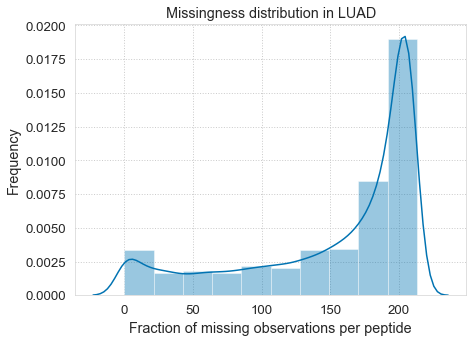

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax = sns.distplot(p_nan_counts, 10)
ax.set_title("Missingness distribution in LUAD")
ax.set_ylabel("Frequency")
ax.set_xlabel("Fraction of missing observations per peptide")

print("distribution mean:", np.mean(p_nan_counts))

### Filter peptides based on a threshold of missingness

In [8]:
from msresist.pre_processing import filter_NaNpeptides

X_f = filter_NaNpeptides(X, cut=0.10)
d_f = X_f.select_dtypes(include=['float64']).T
i_f = X_f.select_dtypes(include=['object'])

## Run Model

Reduce data set:

In [9]:
# Reduce data set?
# npept = 7000
# d = d.iloc[:, :npept]
# i = i.iloc[:npept, :]

#Drop NaN?
# d = d.iloc[:8, :].dropna(axis=1)
# i = i.iloc[d.columns, :]

Run model:

In [10]:
%%time
distance_method = "PAM250"
ncl = 20
SeqWeight = 50

MSC = MassSpecClustering(i_f, ncl, SeqWeight=SeqWeight, distance_method=distance_method, n_runs=1).fit(d_f, "NA")

init
initialized
Compute all pairwise distances
pairwise distances matrix ready
start EM
__________________________________________
N_ITER: 0
20
Cluster sizes: [29, 2, 648, 798, 83, 1397, 553, 180, 106, 154, 1916, 149, 4408, 3413, 547, 59, 6291, 29, 343, 4161]
19.52757830074833
SeqWins: 12097 DataWins: 12460 BothWin: 421 MixWin: 288
__________________________________________
N_ITER: 1
20
Cluster sizes: [1168, 5587, 206, 333, 194, 580, 240, 75, 548, 288, 1160, 200, 1927, 1420, 322, 559, 4084, 3774, 340, 2261]
49.48269733563185
SeqWins: 18149 DataWins: 6324 BothWin: 644 MixWin: 149
__________________________________________
N_ITER: 2
20
Cluster sizes: [1920, 2057, 507, 321, 1958, 216, 568, 49, 2740, 1812, 1165, 645, 802, 790, 794, 1332, 1941, 2971, 1969, 709]
153.39594151964386
SeqWins: 20963 DataWins: 3357 BothWin: 866 MixWin: 80
__________________________________________
N_ITER: 3
20
Cluster sizes: [2411, 1447, 1624, 954, 1801, 243, 1396, 591, 2310, 888, 591, 1058, 949, 563, 709, 357, 

Save model:

In [68]:
import pickle
with open('CPTACmodel', 'wb') as f:
    pickle.dump([MSC], f)

Load if necessary:

In [69]:
# with open('CPTACmodel', 'rb') as f:
#     msc_foo = pickle.load(f)

## Hierarchical Clustering

In [264]:
centers = MSC.transform(d_f)
centers["Patient_ID"] = X.columns[4:]

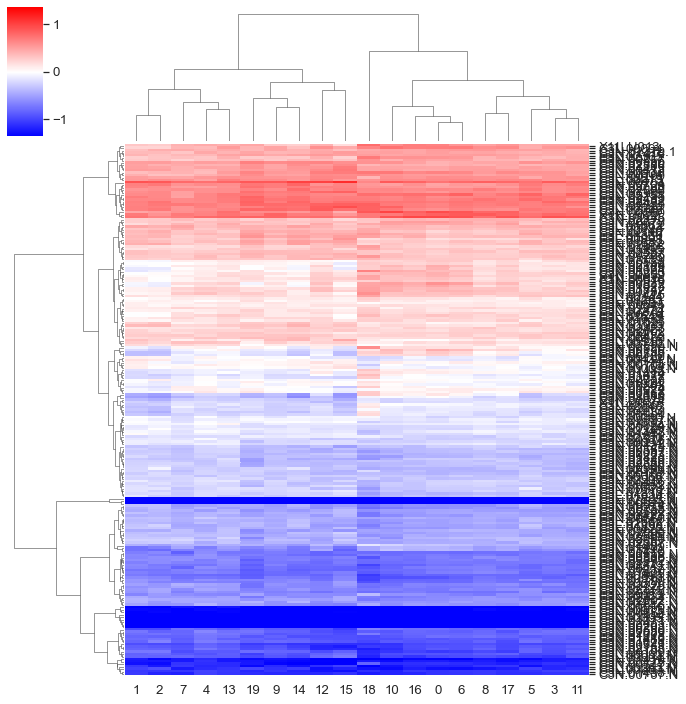

In [245]:
from msresist.figures.figure1 import plotClustergram
import seaborn as sns
centers = centers.set_index(["Patient_ID"])
plotClustergram(centers, "", lim=max(np.max(np.abs(centers)) * 0.5), figsize=(10, 10))
centers = centers.reset_index()
# plt.savefig("CPTAC_GMM.svg", bbox_inches='tight', format='svg', dpi=1200)

## Regression against Clinical Features

Import 2y-Survival data:

In [246]:
cf = pd.read_csv("msresist/data/MS/CPTAC/Y_CPTAC.csv").drop("Metastasis", axis=1)
cf_ = cf.replace("Living", 0)
cf_ = cf_.replace("Deceased", 1)
cf_ = cf_.replace("No", 0)
cf_ = cf_.replace("Yes", 1)

In [247]:
cf_.shape

(111, 2)

Import patient accessions to match signaling with clinical data:

In [248]:
IDict = pd.read_csv("msresist/data/MS/CPTAC/IDs.csv", header=0)
IDict_ = dict(zip(IDict.iloc[:, 0], IDict.iloc[:, 1]))

Change patient IDs from Case ID to Broad ID:

In [249]:
ids = []
for i in range(cf.shape[0]):
    ids.append(IDict_[cf_.iloc[i, 0]])
cf_["Patient_ID"] = ids

Add Tumor row per patient:

In [250]:
for i in range(cf_.shape[0]):
    id_ = cf_.iloc[i, 0].split(".N")[0]
    cf_.loc[-1] = [id_, cf_.iloc[i, 1]]
    cf_.index = cf_.index + 1
cf_.loc[-1] = ["C3N.02379.1", 0]
cf_.index = cf_.index + 1
cf_ = cf_.sort_index()

In [251]:
centers.head()

,Patient_ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,C3N.01799,0.272366,0.293561,0.282858,0.354312,0.369110,0.290429,0.282272,0.265850,0.264308,0.289577,0.360565,0.297754,0.336727,0.264361,0.375401,0.397530,0.314437,0.260726,0.548751,0.389106
1,C3N.01799.N,-0.820849,-0.549682,-0.599395,-0.742089,-0.594562,-0.591430,-0.798028,-0.699174,-0.723425,-0.652971,-0.831067,-0.754112,-0.759776,-0.642583,-0.622412,-0.637099,-0.817348,-0.754458,-1.010601,-0.646715
2,C3L.01890,-0.387526,-0.754872,-0.675446,-0.481665,-0.689816,-0.554771,-0.434048,-0.478465,-0.531920,-0.557684,-0.352862,-0.465265,-0.529195,-0.515237,-0.714979,-0.758142,-0.387469,-0.468571,-0.462494,-0.644590
3,C3L.01890.N,-0.509278,-0.319253,-0.241668,-0.461861,-0.470854,-0.294274,-0.511950,-0.471530,-0.476460,-0.452715,-0.507526,-0.397739,-0.538047,-0.399246,-0.320685,-0.530600,-0.502510,-0.503003,-0.692252,-0.366952
4,C3N.00572,0.103070,-0.043836,-0.109389,0.046443,0.094036,0.082358,0.117454,0.082448,0.104663,0.002225,0.030018,0.065548,-0.010105,0.036545,-0.012704,-0.095763,0.038216,0.071426,-0.022304,0.080597


In [252]:
centers = centers.set_index("Patient_ID").drop(["C3N.02587", "C3N.02587.N"], axis=0).sort_values(by="Patient_ID")
y = pd.read_csv("msresist/data/MS/CPTAC/y.csv").sort_values(by="Patient_ID").set_index("Patient_ID")

### R2Y/Q2Y

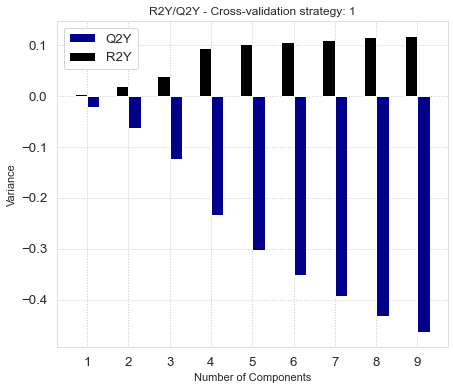

In [254]:
from msresist.figures.figure3 import plotR2YQ2Y
from sklearn.cross_decomposition import PLSRegression

p1 = PLSRegression(n_components=2, scale=False)
fig, ax = plt.subplots(1, 1, figsize=(7,6))
plotR2YQ2Y(ax, p1, centers, y, 1, 10)

In [255]:
centers = centers.reset_index()

## PCA Analysis

In [256]:
from sklearn.decomposition import PCA
from msresist.figures.figure1 import pca_dfs

c=2
pp = PCA(n_components=c)
dScor_ = pp.fit_transform(centers.iloc[:, 1:])
dLoad_ = pp.components_
dScor_, dLoad_ = pca_dfs(dScor_, dLoad_, centers, c, ["Patient_ID"], "Cluster")

In [257]:
dScor_.columns = ["PC1", "PC2", "Patient_ID"]

In [258]:
tumortype = []
for i in range(dScor_.shape[0]):
    if ".N" in dScor_["Patient_ID"][i]:
        tumortype.append("Normal")
    else:
        tumortype.append("Tumor")

In [259]:
dScor_["Type"] = tumortype

In [260]:
varExp = np.round(pp.explained_variance_ratio_, 2)

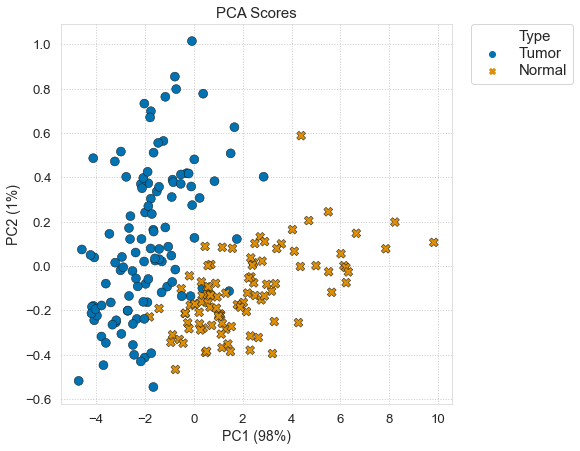

In [261]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.scatterplot(x="PC1", y="PC2", data=dScor_, hue="Type", style="Type", ax=ax, s=80, **{'linewidth':.5, 'edgecolor':"k"})
ax.set_title("PCA Scores", fontsize=15)
ax.set_xlabel("PC1 (" + str(int(varExp[0] * 100)) + "%)", fontsize=14)
ax.set_ylabel("PC2 (" + str(int(varExp[1] * 100)) + "%)", fontsize=14)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, labelspacing=0.2, fontsize=15);
# plt.savefig("PCA_CPTAC_20cl_Scores.svg", bbox_inches='tight', format='svg', dpi=1200)

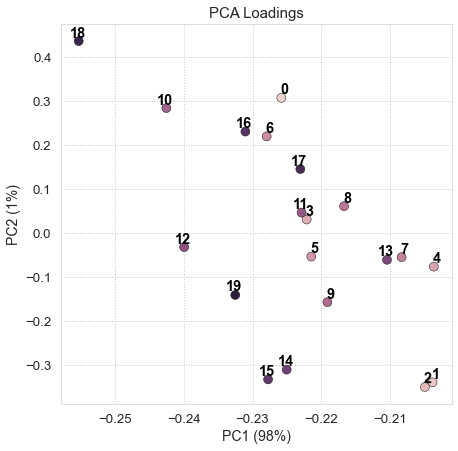

In [262]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.scatterplot(x="PC1", y="PC2", data=dLoad_, hue="Cluster", ax=ax, s=80, **{'linewidth':.5, 'edgecolor':"k"})
for line in range(0, dLoad_.shape[0]):
     ax.text(dLoad_.iloc[line, 0]+0.001, dLoad_.iloc[line, 1]+0.009, dLoad_["Cluster"][line], horizontalalignment='right', size='medium', color='black', weight='semibold')
ax.legend().remove()
ax.set_title("PCA Loadings", fontsize=15)
ax.set_xlabel("PC1 (" + str(int(varExp[0] * 100)) + "%)", fontsize=14)
ax.set_ylabel("PC2 (" + str(int(varExp[1] * 100)) + "%)", fontsize=14);
# plt.savefig("PCA_CPTAC_20cl_Loadings.svg", bbox_inches='tight', format='svg', dpi=1200)

In [263]:
clustermembers = MSC.clustermembers(X_f.T)
clustermembers.head(5)

,Protein_C1,Gene_C1,Sequence_C1,Position_C1,Protein_C2,Gene_C2,Sequence_C2,Position_C2,Protein_C3,Gene_C3,Sequence_C3,Position_C3,Protein_C4,Gene_C4,Sequence_C4,...,Gene_C17,Sequence_C17,Position_C17,Protein_C18,Gene_C18,Sequence_C18,Position_C18,Protein_C19,Gene_C19,Sequence_C19,Position_C19,Protein_C20,Gene_C20,Sequence_C20,Position_C20
0,NP_036253.2,CDC42EP4,AAAAPsPGSAR,S292-p,NP_000398.1,GP1BB,AAARLsLTDPL,S191-p,NP_001317582.1,UNC13B,AAAQCsFEDPD,S176-p,NP_001161299.2,TFEB,FAAHIsPAQGS,...,TBL1XR1,AAAAAsQQGSA,S119-p,NP_060548.2,LARP1B,AFCSHtESAPN,T329-p,NP_003153.2,STRN,AAADFsDEDED,S245-p,NP_001308572.1,ROCK2,HVRPVtQTDVY,T1212-p
1,NP_036253.2,CDC42EP4,AAAAPsPGsAR,S292-p;S295-p,NP_001295292.1,MAP1S,AAGGGsWDDRL,S321-p,NP_001181883.1,MATR3,AAATQsLSMPA,S35-p,NP_858058.1,OGT,FADAHsNLASI,...,WRNIP1,AAAAGsASPRS,S151-p,NP_036515.4,OSTF1,AFDMAtNAACA,T181-p,NP_001155133.1,WWC1,AAAFDsDESEA,S651-p,NP_001028723.1,TOM1L2,IARLRsELDVV,S226-p
2,NP_001099032.1,UBE4B,AAAARsPDRNL,S238-p,NP_002620.1,PGAM1,AAHGNsLRGIV,S189-p,XP_005267119.1,NHSL1,AAEGCsLDGLA,S1555-p,NP_958786.1;NP_000436.2;NP_958782.1,PLEC,FADMLsGNAGG,...,PI4K2A,AAAAGsGPSPP,S44-p,NP_000042.3,ATM,AFEEGsQSTTI,S1981-p,NP_001304919.1,ZBTB7A,AAAGDsDEESR,S337-p,NP_001271174.1,SIPA1L1,IDRQNtQSDIG,T1190-p
3,NP_001349772.1,EP300,AAATQsPGDSR,S1726-p,NP_112533.1,HNRNPA2B1,AARPHsIDGRV,S85-p,NP_004081.1,DUSP3,AAEGRsFMHVN,S67-p,NP_060910.3,PAG1,FAEYAsVDRNK,...,PI4K2A,AAAAGsGPsPP,S44-p;S47-p,NP_005768.1,RBM6,AFEHEsPADFQ,S353-p,NP_001304919.1,ZBTB7A,AAAGDsDEEsR,S337-p;S341-p,NP_001294976.1,PRUNE2,IDRRAsDSVFQ,S699-p
4,NP_001138837.1,ZNF652,AAATTsPTPRT,S204-p,NP_001307677.1,CCNT2,AASSSsVTSPI,S477-p,NP_001180317.2,UNKL,AAGPRsLAGSA,S453-p,NP_000204.3;NP_001005619.1,ITGB4,FAFPGsTNSLH,...,SLC12A7,AAAARtQAPPT,T968-p,NP_036253.2,CDC42EP4,AFGDLtDLPVV,T188-p,NP_891552.1,HEATR3,AAANGtGGEED,T31-p,NP_004152.1;NP_112243.1,RAB1A,IDRYAsENVNK,S114-p
